In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('/content/BeerDataScienceProject.csv')

In [11]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325.0,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1.234818e+09
1,6.2,48213,10325.0,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1.235915e+09
2,6.5,48215,10325.0,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1.235917e+09
3,5.0,47969,10325.0,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1.234725e+09
4,7.7,64883,1075.0,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1.293735e+09


In [12]:
df.shape

(194479, 13)

In [13]:
df.isnull().sum()

,0
beer_ABV,6720
beer_beerId,0
beer_brewerId,1
beer_name,1
beer_style,1
review_appearance,1
review_palette,1
review_overall,1
review_taste,1
review_profileName,39


In [14]:
df[['review_appearance','review_palette','review_overall','review_taste','review_aroma']].describe()

,review_appearance,review_palette,review_overall,review_taste,review_aroma
count,194478.000000,194478.000000,194478.000000,194478.000000,194478.000000
mean,3.892957,3.813910,3.870566,3.811313,3.868029
std,0.593090,0.675592,0.693048,0.657291,0.703508
min,0.000000,1.000000,0.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.500000,4.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
df = df.dropna()

In [16]:
df.shape

(187683, 13)

In [17]:
df['review_time'] = pd.to_datetime(df['review_time'],unit='s')
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325.0,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03
1,6.2,48213,10325.0,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57
2,6.5,48215,10325.0,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01 14:10:04
3,5.0,47969,10325.0,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15 19:12:25
4,7.7,64883,1075.0,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30 18:53:26


**Question 1:**
Rank the top 3 breweries which produce the strongest beers.
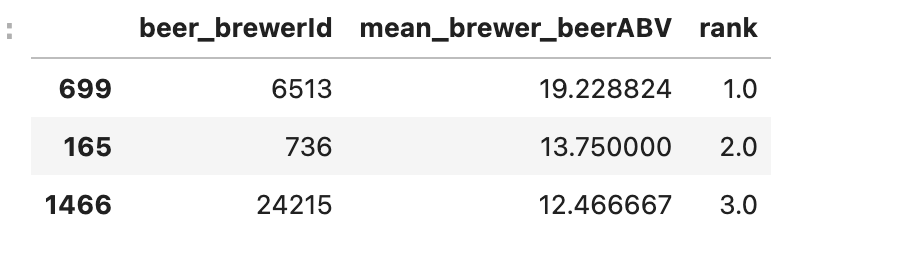

Method: Use Average strength across all beers. Not max(), as it will pick any one strongest among all in the brewer while the rest remains small

In [18]:
strongest_brewery = df.groupby('beer_brewerId')['beer_ABV'].mean().nlargest(3)
strongest_brewery

,beer_ABV
beer_brewerId,
6513.0,19.228824
736.0,13.750000
10226.0,11.000000


Note: Always end with a chart, for the easier understanding of question

**Question 2:**
Which year did beers enjoy the highest ratings?
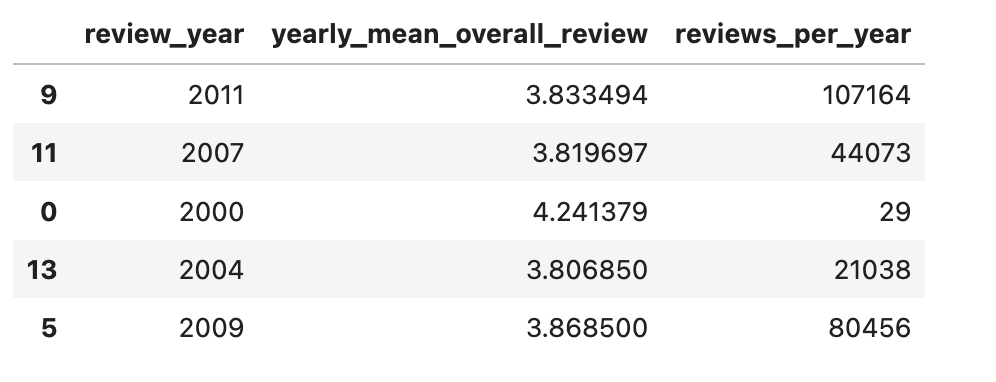

Method: the number of reviews are taken into consideration along with the mean.

In [19]:
# timestamps are Unix timestamps (seconds since 1970). Without unit='s', pandas might not convert them correctly
df['year'] = pd.to_datetime(df['review_time'],unit='s').dt.year

#Mean is enough, as the max rating in a year doesn't tell if beers were highly rated overall
high_rate = df.groupby('year')['review_overall'].mean().reset_index()

#Calculating the number of reviews for each year
review_counts = df.groupby('year').size().reset_index(name='review_count')
review_counts

high_rate = high_rate.merge(review_counts,on='year')


# Returns: The year with highest mean rating
high_rate

,year,review_overall,review_count
0,1998,3.800000,5
1,1999,4.000000,9
2,2000,4.277778,18
3,2001,4.003378,148
4,2002,3.789086,1970
5,2003,3.770459,4729
6,2004,3.808696,6095
7,2005,3.842319,8235
8,2006,3.816968,12323
9,2007,3.857757,14433


**Question 3:** Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
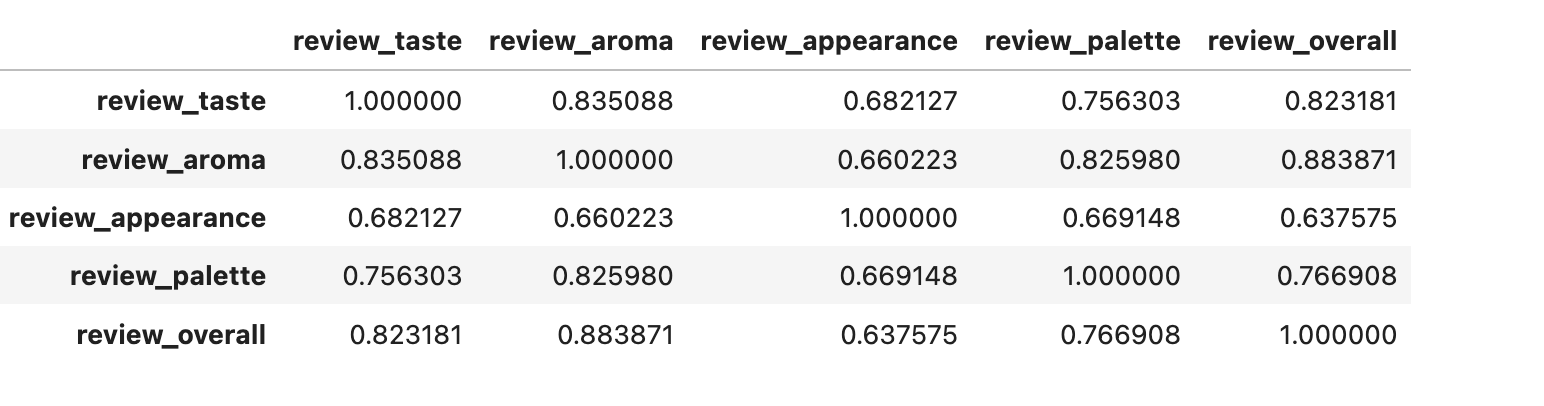

Method: The question actually means does taste, aroma, appearance, or palette have the biggest influence on how users rate beers overall?
Analogy: It's like asking "Which ingredient makes a cake taste good - flour, sugar, or eggs?" and if we think like "18 cups total!" - that's not what was asked!. To know which factors are important, you need to see how they relate to the overall rating.

So, aggregate reviews per beer

Multiple people review the same beer > Take the average of all reviews for each beer > This gives you a cleaner dataset > Calculate correlation

*Why Correlation Answers the Question:*

Correlation measures, "When factor X is high, does the overall rating also tend to be high?"

*  High correlation (close to 1.0) = That factor is IMPORTANT in determining overall rating
*  Low correlation (close to 0) = That factor doesn't matter much


In [20]:
factor = df.groupby('beer_beerId')[['review_taste','review_aroma','review_appearance','review_palette','review_overall']].mean()
q3 = factor.corr()
q3

,review_taste,review_aroma,review_appearance,review_palette,review_overall
review_taste,1.000000,0.820726,0.677525,0.741298,0.813086
review_aroma,0.820726,1.000000,0.661109,0.818773,0.879738
review_appearance,0.677525,0.661109,1.000000,0.666505,0.633069
review_palette,0.741298,0.818773,0.666505,1.000000,0.756235
review_overall,0.813086,0.879738,0.633069,0.756235,1.000000


Higher correlation = higher importance. According to the cell output, the aroma is the most important factor for the beer, having a 0.88 correlation with the overall review grade, followed closely by the taste and the palette. The appearance is the least important, but still, has a high correlation coefficient.

<Axes: >

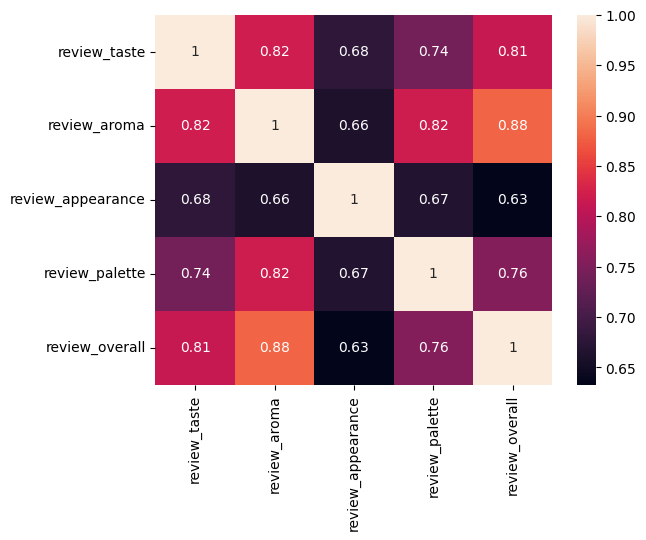

In [21]:
import seaborn as sns
sns.heatmap(q3,annot=True)

**Question 4:**
If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

Method: Investigate the data distribution > Choose a threshold that ensures reliability (200+ reviews) > Pick top 3 from those

In [22]:
#Count the number of reviews
beer_stats = df.groupby('beer_beerId')['review_overall'].agg(['count','mean']).reset_index()
beer_stats.columns = ['beer_beerId','num_reviews','avg_reviews']

In [23]:
#Investigate the distribution
beer_stats['num_reviews'].describe()

,num_reviews
count,6029.000000
mean,31.130038
std,136.908977
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,2998.000000


<Axes: >

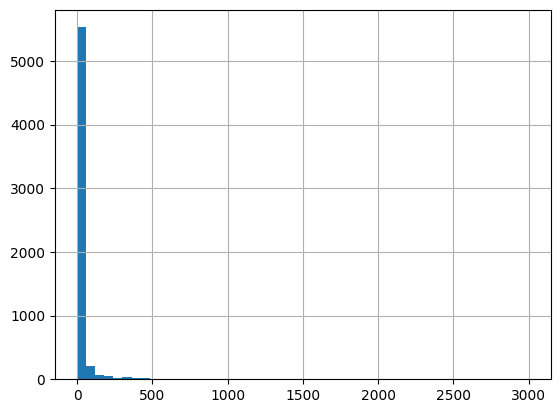

In [24]:
beer_stats['num_reviews'].hist(bins=50)

As expected, a huge spike is noticed in the lowest bucket. Empirically, we choose 200 reviews as a cut-off point above which we will recommend beers.

In [25]:
#setting the threshold of having atleast 200 reviews
reliable_beers = beer_stats[beer_stats['num_reviews'] >= 200]

In [26]:
#Getting the top 3 in the df
top_3 = reliable_beers.head(3)

In [27]:
result = top_3.merge(df[['beer_beerId', 'beer_name']].drop_duplicates(), on='beer_beerId')
result

,beer_beerId,num_reviews,avg_reviews,beer_name
0,80,245,3.767347,Organic Münster Alt
1,81,215,3.904651,Organic Ur Pils
2,82,211,3.668246,Organic Hefe-Weizen


**Question 5:**
Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?


In [31]:
!pip install nltk

In [33]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()
df['review_sentiment'] = df['review_text'].apply(lambda x: analyser.polarity_scores(text=x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [38]:
sentiment_stats = df.groupby('beer_style')['review_sentiment'].agg(['count','mean'])
sentiment_stats.describe()

,count,mean
count,102.000000,102.000000
mean,1840.029412,0.729955
std,3397.860152,0.107571
min,3.000000,0.246770
25%,319.500000,0.689519
50%,815.000000,0.750756
75%,2048.750000,0.795878
max,24191.000000,0.946900


In [39]:
reliable_styles = sentiment_stats[sentiment_stats['count'] >= 200]
reliable_styles.sort_values('mean', ascending=False).head(10)

,count,mean
beer_style,,
Wheatwine,538,0.871259
American Double / Imperial Stout,18048,0.854217
Flanders Red Ale,1981,0.848755
Weizenbock,538,0.847254
Rye Beer,4179,0.845961
Rauchbier,2003,0.844796
Berliner Weissbier,321,0.834119
Old Ale,2486,0.833365
American Strong Ale,3185,0.832549


In [40]:
df_q5 = df[df['beer_style'] == 'Wheatwine']
df_q5[['review_sentiment','review_overall']].corr()

,review_sentiment,review_overall
review_sentiment,1.000000,0.234211
review_overall,0.234211,1.000000


<Axes: >

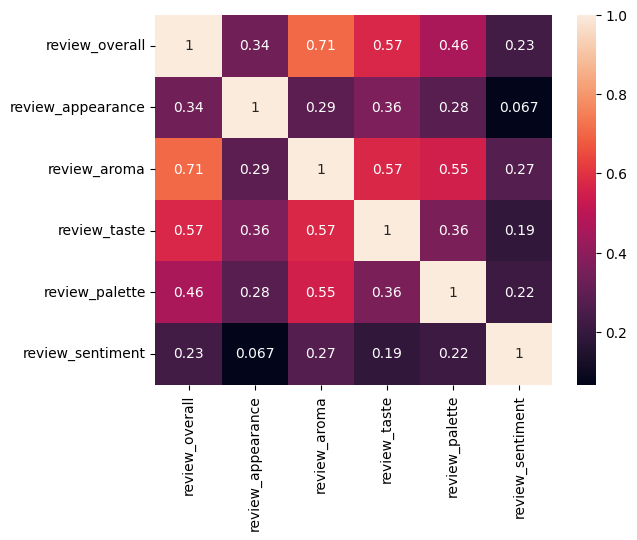

In [41]:
sns.heatmap(data=df_q5[[
    "review_overall",
    "review_appearance",
    "review_aroma",
    "review_taste",
    "review_palette",
    "review_sentiment"
]].corr(), annot=True)

Wheatwine (highest sentiment: 0.871) could be people's favorite. But depending on the heatmap and overall review, there is low positive correlation (0.23) between text sentiment and overall score. This means,  there exists a relationship (positive = when text is positive, scores tend to be higher). But it's WEAK (people's written words don't perfectly match their numerical ratings).

This is happening because, Text is nuanced, while numbers are simple
NLP models miss sarcasm, context, beer jargon
Someone might write "pretty good" (neutral sentiment) but give 4.5 stars (high rating)